# Customer Churn Analysis: An Exploratory Data Analysis Project

## Executive Summary

This notebook presents an analysis of customer churn within our hypothetical telecommunications company. Our primary goal is to **identify key factors driving customer attrition** and **propose actionable strategies to reduce churn**. We analyzed customer demographics, service usage patterns, and contract details to uncover insights. 

**Key Findings:**
* Customers on **month-to-month contracts** have a significantly higher churn rate.
* Customers with **fiber optic internet** and **multiple online services** (like online security or tech support) tend to churn more.
* Lack of **paperless billing** and **electronic checks** as payment methods are also associated with higher churn.

**Recommendations:**
* **Promote long-term contracts:** Offer incentives for customers to switch to 1-year or 2-year contracts.
* **Improve fiber optic service reliability and support:** Address underlying issues causing dissatisfaction among fiber optic users.
* **Educate customers on benefits of digital services:** Highlight the value of online security and tech support to encourage retention.
* **Optimize billing and payment options:** Encourage paperless billing and explore more convenient digital payment methods.

---

##  Project Setup and Data Loading

We begin by importing necessary libraries and loading our customer data. The dataset contains various customer attributes and their churn status.

---

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset
df=pd.read_csv('Customer churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


##  Data Overview and Preprocessing

Before diving into analysis, we'll inspect the data types, check for missing values, and perform necessary data cleaning steps.

---

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [15]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.isnull().sum().sum()

np.int64(0)

In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [24]:
df.duplicated().sum()

np.int64(0)

In [26]:
df["customerID"].duplicated().sum()

np.int64(0)

In [19]:
def conv(value):
    if value == 1:
        return"yes"
    else:
        return"no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)
    

#### Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [30]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


##  Exploratory Data Analysis (EDA)

In this section, we'll visualize the distribution of key features and their relationship with customer churn. This helps us identify potential churn drivers.

---

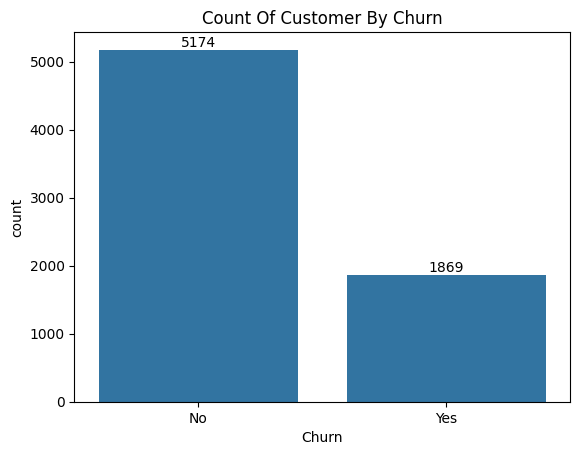

In [10]:
ax = sns.countplot(x ='Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customer By Churn")
plt.show()

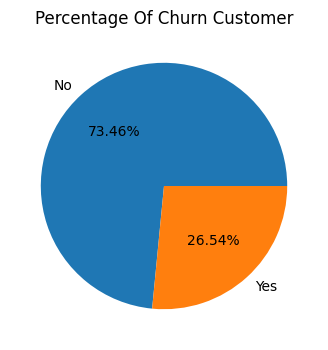

In [11]:
plt.figure(figsize = (4,4))
gb = df.groupby('Churn').agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage Of Churn Customer")
plt.show()

#### From the given pie chart we can conclude that 26.54% of our customers have churned out. now let's explore the reason behind it 

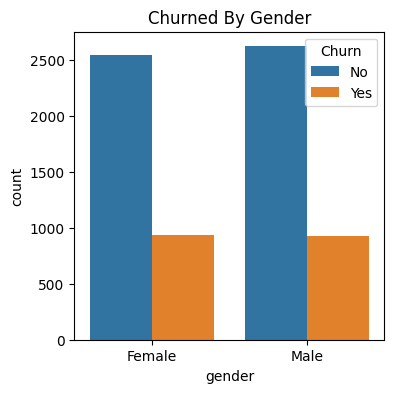

In [17]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'gender', data = df, hue='Churn')
plt.title('Churned By Gender')
plt.show()

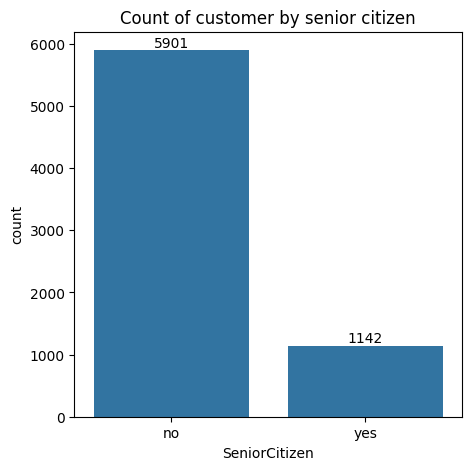

In [26]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of customer by senior citizen')
plt.show()

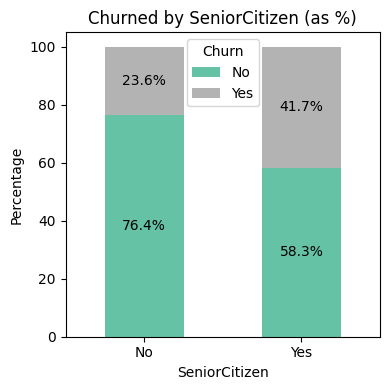

In [27]:
# Create crosstab (counts)
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Convert to percentage
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot
ax = ct_pct.plot(kind='bar', stacked=True, figsize=(4,4), colormap='Set2')

# Add percentage labels
for i, total in enumerate(ct.sum(axis=1)):
    bottom = 0
    for j, val in enumerate(ct_pct.iloc[i]):
        percent = f"{val:.1f}%"
        plt.text(i, bottom + val/2, percent, ha='center', va='center', fontsize=10)
        bottom += val

plt.title('Churned by SeniorCitizen (as %)')
plt.ylabel('Percentage')
plt.xlabel('SeniorCitizen')
plt.legend(title='Churn', loc='upper center')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()

#### Comparatively a greater percentage of people in senior citizen category have churned.

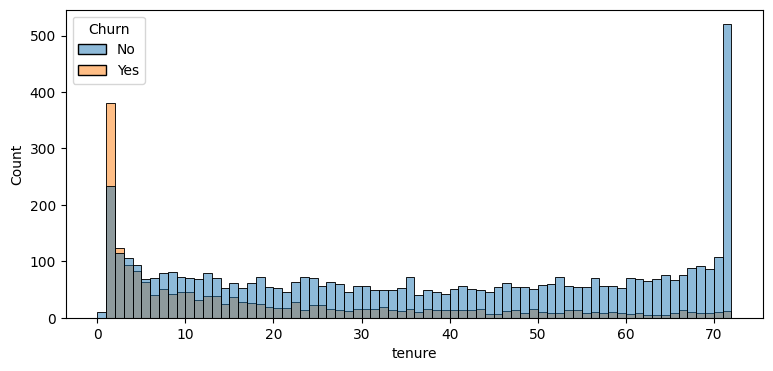

In [32]:
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure', data = df,bins = 72,hue = 'Churn')
plt.show()

#### People who have used our services for a long time have stayed and People who have used our services 1 or 2 mounths have churned

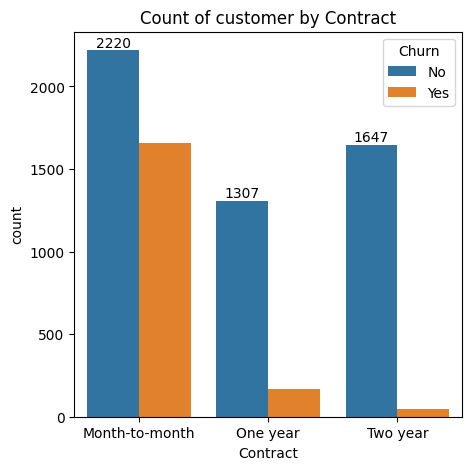

In [34]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of customer by Contract')
plt.show()

#### People who have month to month contract are likely to churn then from those who have 1 or 2 years of contracts

In [36]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

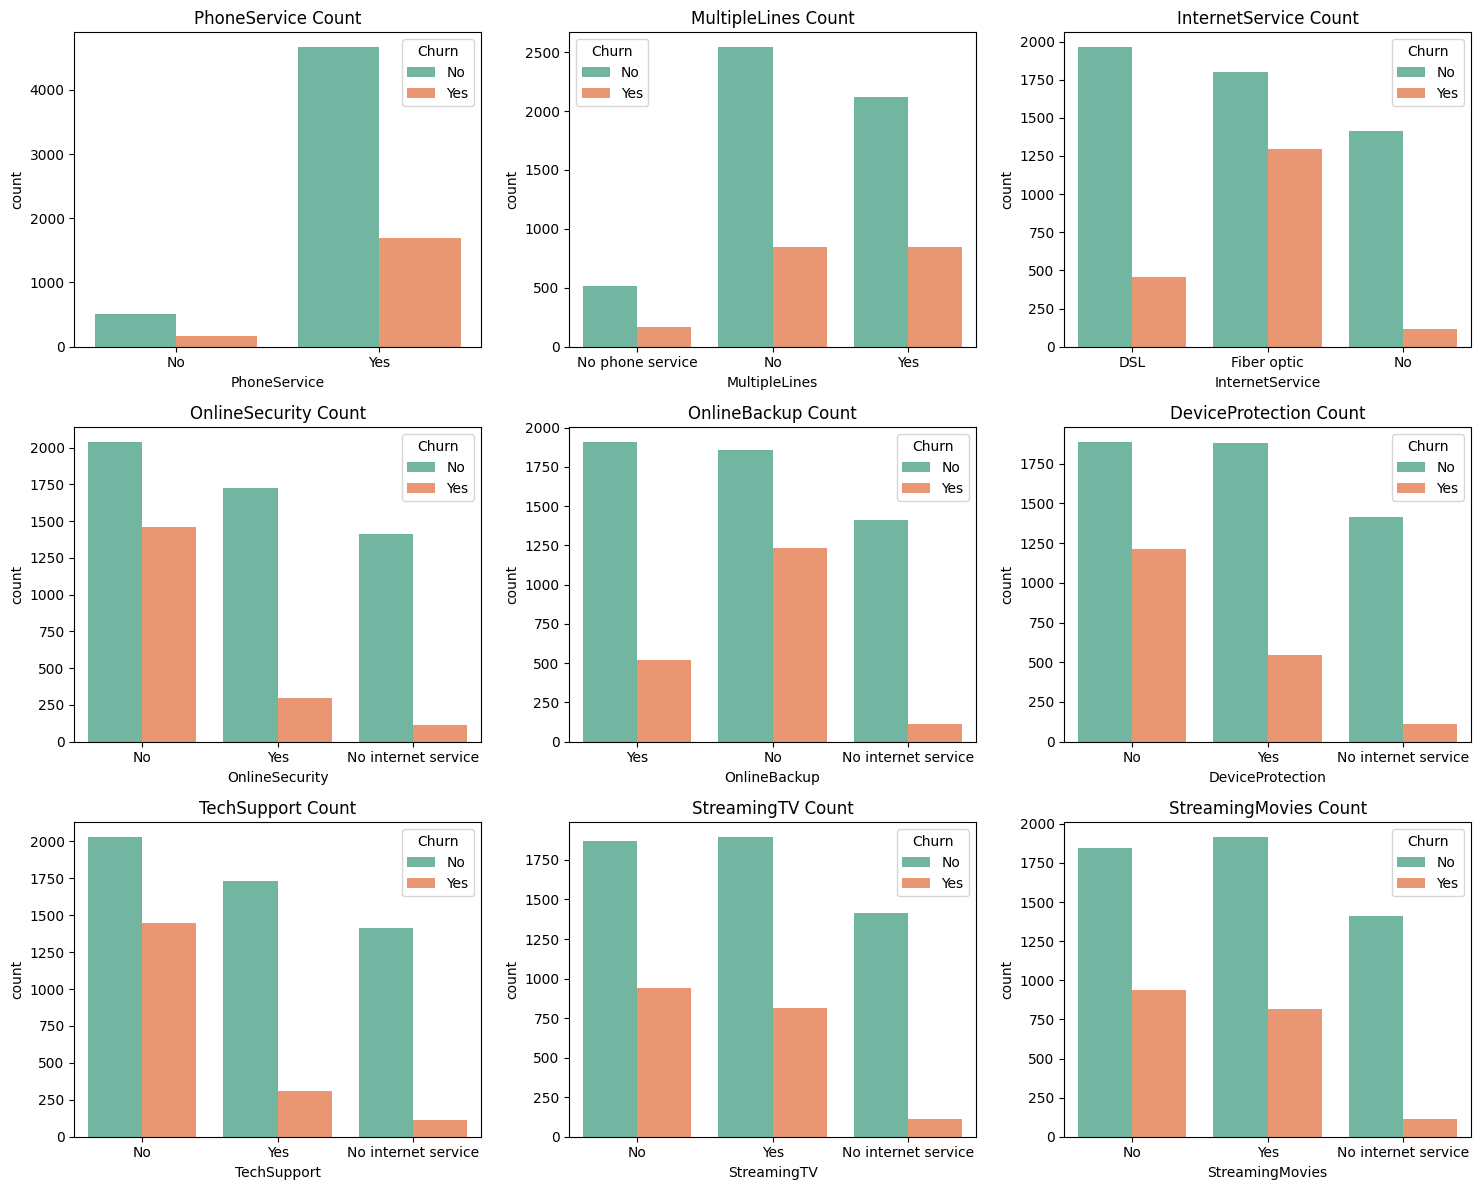

In [44]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplot grid (3 rows x 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()  # Make it easier to loop over

# Loop through each column and plot
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette='Set2', hue='Churn')
    axes[i].set_title(f'{col} Count')
    axes[i].tick_params(axis='x')

plt.tight_layout()
plt.show()

* #### Customers without extra services (like OnlineSecurity, TechSupport, or DeviceProtection) are more likely to churn. 
* #### Those with Fiber optic internet or Streaming services show higher churn rates than those with DSL or no internet.
* #### Phone service users generally have lower churn, while customers without phone service churn more.
* #### Across all features, churn is more common when customers lack value-added services, suggesting service bundling may improve retention.

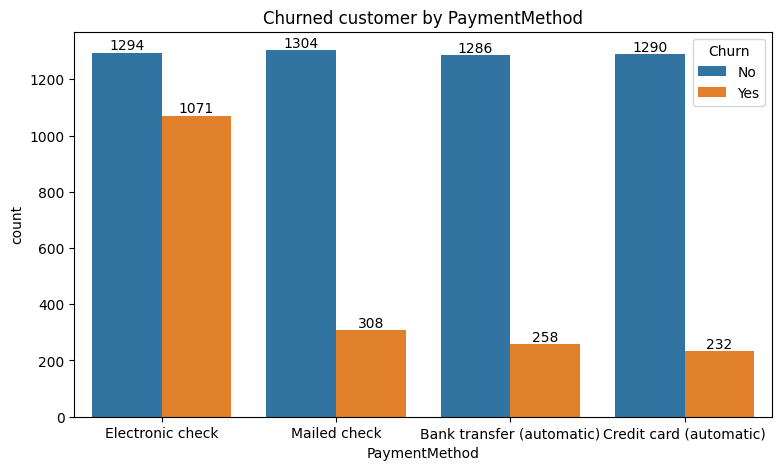

In [62]:
plt.figure(figsize = (9,5))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churned customer by PaymentMethod')
plt.show()

#### Customer is likely to churn when he is using electronic check as a payment method.

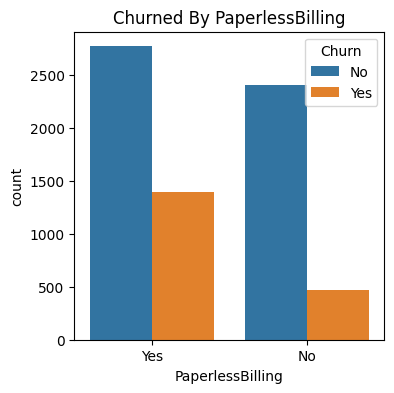

In [10]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'PaperlessBilling', data = df, hue='Churn')
plt.title('Churned By PaperlessBilling')
plt.show()

#### Analysis shows that customers using paperless billing are more likely to churn than those who prefer paper billing. This could be due to digital communication gaps, lack of perceived value, or reduced engagement

##  Key Findings and Recommendations

Based on our exploratory analysis, we've identified several factors strongly correlated with customer churn. Here's a summary of the findings and our actionable recommendations.

---

### **Findings:**

1.  **Contract Type:** The **month-to-month contract** group exhibits a significantly higher churn rate compared to 1-year and 2-year contract holders. This suggests customers on shorter commitments are more prone to leaving.
2.  **Internet Service:** Customers with **Fiber optic** internet service show a concerningly high churn rate. This could indicate issues with service reliability, speed, or customer support specific to fiber optic users.
3.  **Monthly Charges:** While not a single threshold, customers with **higher monthly charges** (especially those with fiber optic) appear to have a higher likelihood of churning, suggesting a potential value perception issue.
4.  **Payment Method:** Customers using **Electronic check** for payment have a notable higher churn rate. This might be linked to the convenience or security perception of this payment method.
5.  **Online Services:** Customers lacking additional online services (e.g., OnlineSecurity, DeviceProtection, TechSupport) are also more likely to churn, indicating that these value-added services help in customer stickiness.

### **Recommendations:**

1.  **Incentivize Long-Term Contracts:** Develop attractive promotions and discounts for customers willing to sign 1-year or 2-year contracts. This increases commitment and reduces churn risk.
2.  **Improve Fiber Optic Service & Support:** Investigate and resolve common issues reported by fiber optic customers. Enhance technical support and proactive communication to improve their experience.
3.  **Re-evaluate Pricing for High-Tier Services:** For customers with high monthly charges, ensure the perceived value matches the cost. Consider bundled offers or loyalty discounts.
4.  **Promote Secure & Convenient Payment Methods:** Encourage adoption of safer and more convenient payment options like bank transfer or credit card auto-pay, potentially by offering incentives or educational campaigns.
5.  **Bundling and Value-Added Services:** Actively market and bundle online security, tech support, and other add-on services to increase customer stickiness and demonstrate added value.
6.  **Proactive Engagement:** Implement early warning systems to identify customers at risk of churning (e.g., based on declining usage, support tickets) and initiate targeted retention efforts.

---

## Conclusion

By focusing on these identified churn drivers and implementing the proposed recommendations, we can significantly improve customer retention and contribute to the company's long-term growth. Continuous monitoring of churn metrics and customer feedback will be crucial for ongoing success.

---